<a href="https://colab.research.google.com/github/ARYAA98/EDA-on-Titanic-Dataset/blob/main/EDA_ON_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS AND SET UP

In [ ]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# Setting up visual styles for better aesthetics in plots
sns.set(style="whitegrid")

## DATA LOADING

In [ ]:
# Loading the Titanic dataset from a CSV file
train_df=pd.read_csv("titanic.csv")

In [ ]:
# Display the first few rows of the dataframe to understand its structure
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DATA CLEANING AND PRE-PROCESSING

### Missing values

In [ ]:
# Checking for missing values in the dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

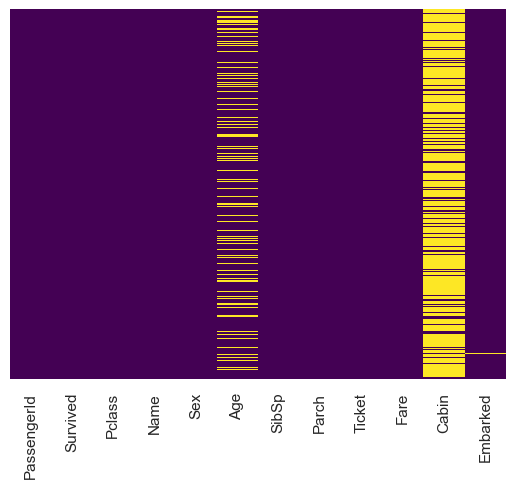

In [ ]:
# The missing values
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Survived', ylabel='count'>

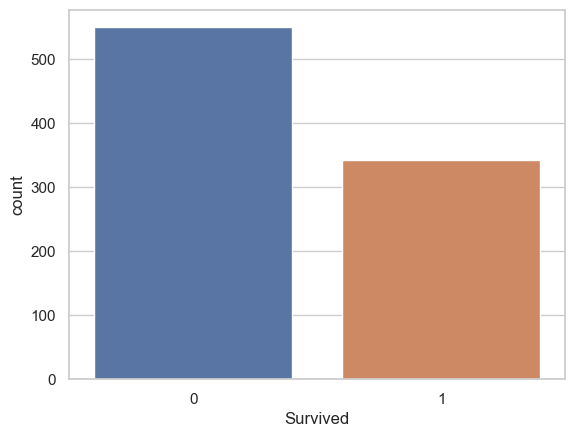

In [ ]:
# Visualizing the distribution of key variables
sns.countplot(x='Survived',data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

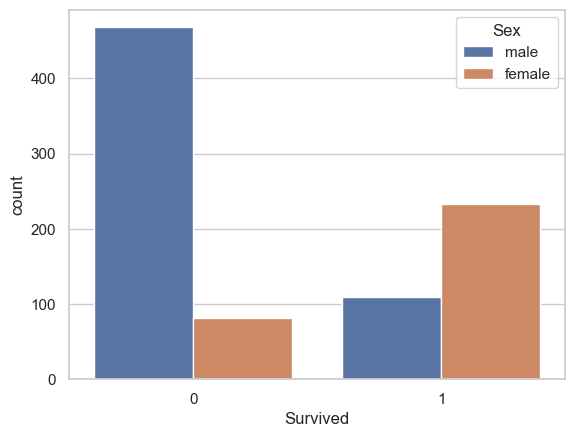

In [ ]:
# Visualizing the Survuivl rate by gender
sns.countplot(x='Survived',hue='Sex',data=train_df)

In [ ]:
train_df['Pclass'] = train_df['Pclass'].astype(str)

<Axes: xlabel='Survived', ylabel='count'>

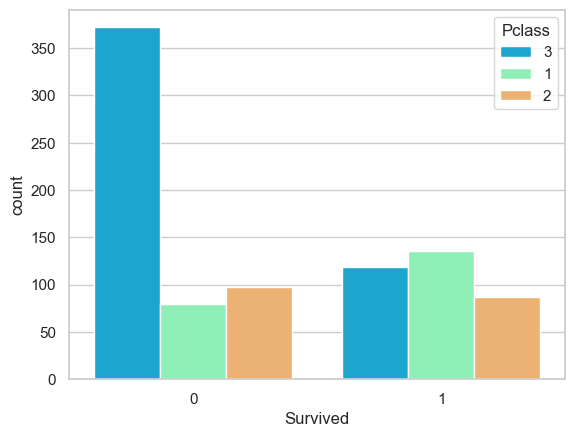

In [ ]:
# Analyzing survival rate by passenger class
sns.countplot(data=train_df,x='Survived',hue='Pclass',palette='rainbow')

C:\Users\asus\AppData\Local\Temp\ipykernel_21924\1838825659.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'].dropna(),kde=False,bins=40)


<Axes: xlabel='Age'>

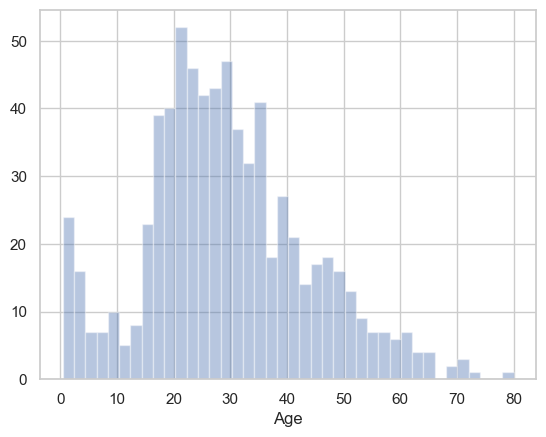

In [ ]:
# the age distribution of the passengers
sns.distplot(train_df['Age'].dropna(),kde=False,bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

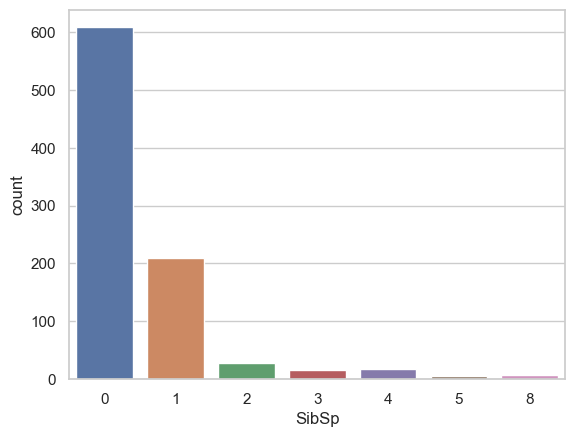

In [ ]:
# Siblings / Spouses on the Titanic
sns.countplot(train_df,x='SibSp')

<Axes: >

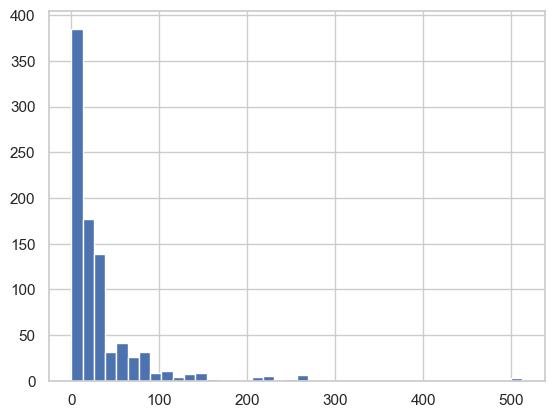

In [ ]:
# distribution of fare
train_df['Fare'].hist(bins=40)

## DATA CLEANING

<Axes: xlabel='Pclass', ylabel='Age'>

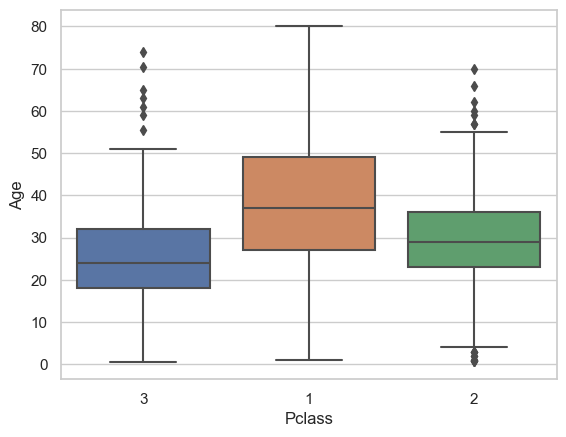

In [ ]:
# finding the mean age in the different Passenger class
sns.boxplot(x=train_df['Pclass'],y=train_df['Age'])

In [ ]:
#to fill in missing age data instead of just dropping the missing age data rows.
# First, calculate the mean age for each passenger class
mean_ages = train_df.groupby('Pclass')['Age'].mean()

# Now, fill the missing values in 'Age' with the mean of their respective 'Pclass'
train_df['Age'] = train_df.apply(
    lambda row: mean_ages[row['Pclass']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

# This code snippet will replace all NaN values in the 'Age' column with the mean age of the respective passenger class found in 'Pclass'


In [ ]:
# checking for the nulll values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# the cabin has large number of null values.
train_df=train_df.dropna()
train_df.drop('Cabin',axis=1,inplace=True)

<Axes: >

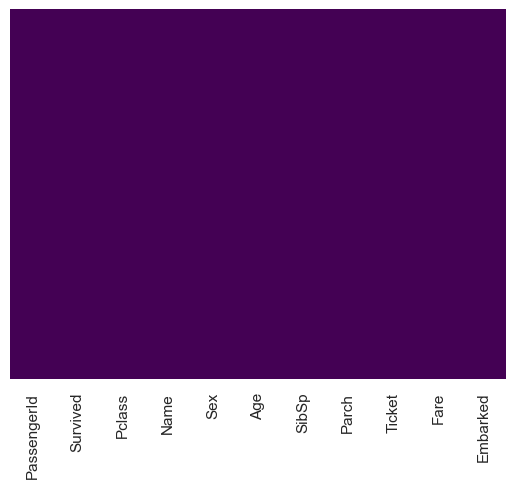

In [ ]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


### Converting Categorical Values

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    object 
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Embarked     202 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 18.9+ KB


In [ ]:
# ONE HOT ENCODING
# Get dummy variables for each category
pd.get_dummies(train_df['Embarked'],drop_first=True).head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [ ]:
sex = pd.get_dummies(train_df['Sex'], drop_first=True)
embark = pd.get_dummies(train_df['Embarked'], drop_first=True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [ ]:
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [ ]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,True


The data is ready for the model!!!!!